In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/test_scores.csv')

In [3]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
school             2133 non-null object
school_setting     2133 non-null object
school_type        2133 non-null object
classroom          2133 non-null object
teaching_method    2133 non-null object
n_student          2133 non-null float64
student_id         2133 non-null object
gender             2133 non-null object
lunch              2133 non-null object
pretest            2133 non-null float64
posttest           2133 non-null float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [5]:
df.columns

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest', 'posttest'],
      dtype='object')

## Testing the causal model by looking at correlations between the features

In [7]:
from scipy.stats import chi2_contingency

We set up a series of $\chi^2$-tests to determine the correlations between the categorical features. We choose the significant level to be $\alpha = 0.01$. The null hypothesis is that the two features are not associated. If the p-value is very small: $p < \alpha$, then the null hypotehsis is rejected and we conclude that the variables are correlated.

In [22]:
def chi2_test(data, feature1, feature2):
    info = chi2_contingency(pd.crosstab(data[feature1], data[feature2]))
    print(
    """chi2 statistic: {0} \n 
    p-value: {1} \n 
    number of dof: {2} \n 
    expected frequencies under the null hypothesis of no association: {3}""".format(str(info[0]), str(info[1]),
                                                                                    str(info[2]), str(info[3])))

#### 1. School setting and teaching method

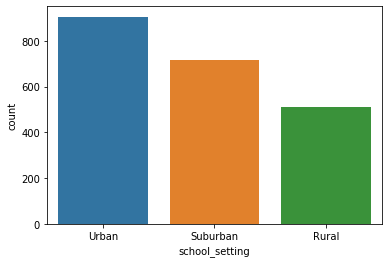

In [11]:
sns.countplot(data=df, x='school_setting');

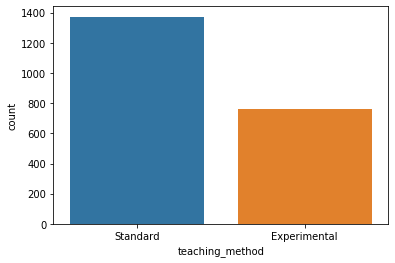

In [12]:
sns.countplot(data=df, x='teaching_method');

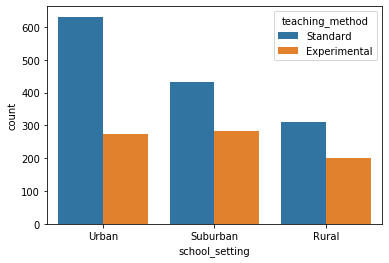

In [13]:
sns.countplot(data=df, x='school_setting', hue='teaching_method');

The fraction of students taught by the experimental method is smaller in urban than in suburban or rural settings. This can also be seen in the following contingency table.

In [8]:
pd.crosstab(df['teaching_method'], df['school_setting'])

school_setting,Rural,Suburban,Urban
teaching_method,,,
Experimental,201,284,275
Standard,309,433,631


In [10]:
201/(201+309), 284/(284+433), 275/(275+631)

(0.3941176470588235, 0.39609483960948394, 0.30353200883002207)

In [9]:
chi2_contingency(pd.crosstab(df['teaching_method'], df['school_setting']))

(19.13030529160426,
 7.013050841722543e-05,
 2,
 array([[181.71589311, 255.47116737, 322.81293952],
        [328.28410689, 461.52883263, 583.18706048]]))

The p-value is small. Therefore, teaching method and school setting are correlated.

#### 2. School setting and school type

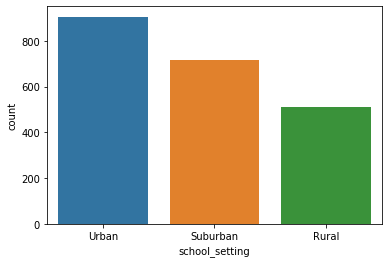

In [24]:
sns.countplot(data=df, x='school_setting');

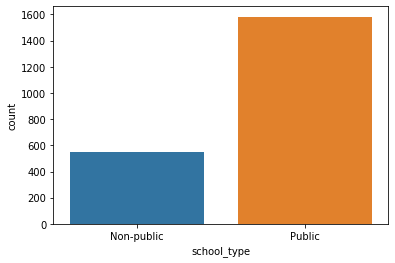

In [25]:
sns.countplot(data=df, x='school_type');

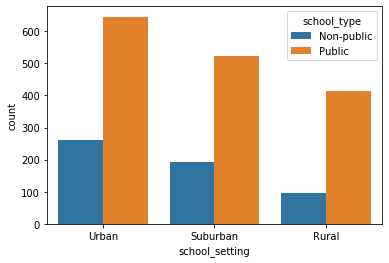

In [26]:
sns.countplot(data=df, x='school_setting', hue='school_type');

In [28]:
pd.crosstab(df['school_type'], df['school_setting'])

school_setting,Rural,Suburban,Urban
school_type,,,
Non-public,97,193,261
Public,413,524,645


In [29]:
97/(97+413), 193/(193+524), 261/(261+645)

(0.19019607843137254, 0.2691771269177127, 0.28807947019867547)

In [30]:
chi2_contingency(pd.crosstab(df['school_type'], df['school_setting']))

(16.982680484913356,
 0.00020523800701307613,
 2,
 array([[131.7440225 , 185.21659634, 234.03938115],
        [378.2559775 , 531.78340366, 671.96061885]]))

School type and school setting are associated.

#### 3. School type and teaching method

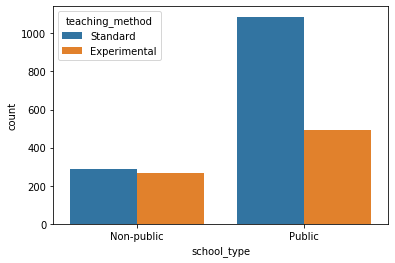

In [31]:
sns.countplot(data=df, x='school_type', hue='teaching_method');

In [32]:
chi2_contingency(pd.crosstab(df['school_type'], df['teaching_method']))

(49.589298992956024,
 1.895447485787072e-12,
 1,
 array([[ 196.32442569,  354.67557431],
        [ 563.67557431, 1018.32442569]]))

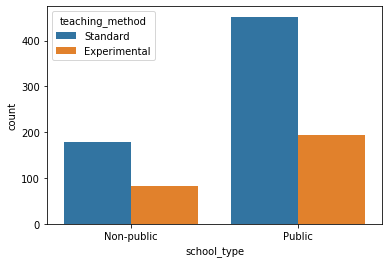

In [33]:
sns.countplot(data=df[df['school_setting']=='Urban'], x='school_type', hue='teaching_method');

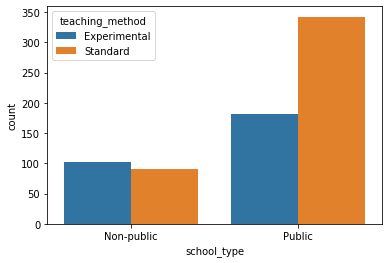

In [38]:
sns.countplot(data=df[df['school_setting']=='Suburban'], x='school_type', hue='teaching_method');

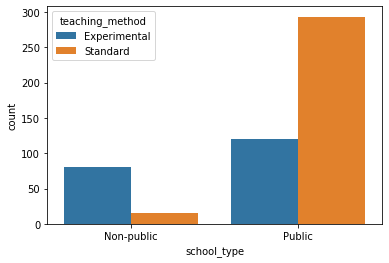

In [39]:
sns.countplot(data=df[df['school_setting']=='Rural'], x='school_type', hue='teaching_method');

In [35]:
chi2_contingency(pd.crosstab(df[df['school_setting']=='Urban']['school_type'], 
                             df[df['school_setting']=='Urban']['teaching_method']))[1]

0.716238764900083

In [36]:
chi2_contingency(pd.crosstab(df[df['school_setting']=='Suburban']['school_type'], 
                             df[df['school_setting']=='Suburban']['teaching_method']))[1]

1.6088295581716766e-05

In [37]:
chi2_contingency(pd.crosstab(df[df['school_setting']=='Rural']['school_type'], 
                             df[df['school_setting']=='Rural']['teaching_method']))[1]

1.6694878514590291e-22

School type and teaching method are correlated and they remain correlated even when we condition on school setting.

#### 4. School setting and number

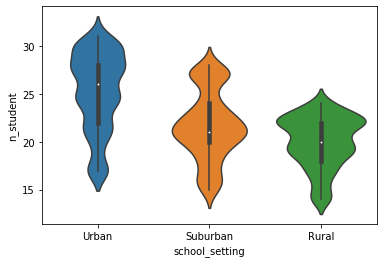

In [42]:
sns.violinplot(data=df, x='school_setting', y='n_student');

In [44]:
pd.crosstab(df['school_setting'], df['n_student'])

n_student,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
school_setting,,,,,,,,,,,,,,,,,,
Rural,28,15,16,34,36,76,60,42,110,69,24,0,0,0,0,0,0,0
Suburban,0,30,48,17,36,38,80,126,88,69,24,25,0,108,28,0,0,0
Urban,0,0,0,85,0,19,20,63,66,0,96,100,26,81,140,29,150,31


#### 5. School-type and number

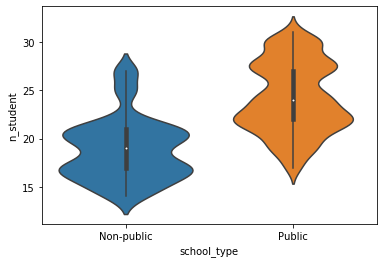

In [53]:
sns.violinplot(data=df, x='school_type', y='n_student');

In [54]:
pd.crosstab(df['school_type'], df['n_student'])

n_student,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
school_type,,,,,,,,,,,,,,,,,,
Non-public,28,45,64,102,36,38,80,84,22,0,0,25,0,27,0,0,0,0
Public,0,0,0,34,36,95,80,147,242,138,144,100,26,162,168,29,150,31


#### 6. Number and teaching method

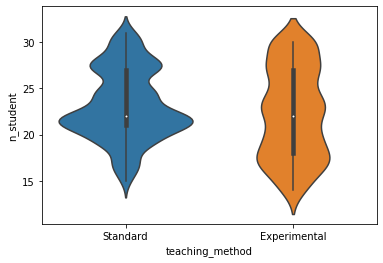

In [55]:
sns.violinplot(data=df, x='teaching_method', y='n_student');

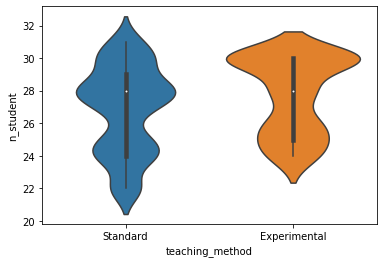

In [67]:
sns.violinplot(data=df[(df['school_type']=='Public')&(df['school_setting']=='Urban')], 
               x='teaching_method', y='n_student');

In [56]:
pd.crosstab(df['teaching_method'], df['n_student'])

n_student,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
teaching_method,,,,,,,,,,,,,,,,,,
Experimental,28,30,32,85,54,38,60,21,44,69,48,25,26,54,56,0,90,0
Standard,0,15,32,51,18,95,100,210,220,69,96,100,0,135,112,29,60,31


In [63]:
pd.crosstab(df[df['n_student'].between(15.0,25.0)]['teaching_method'], 
            df[df['n_student'].between(15.0,25.0)]['n_student'])

n_student,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0
teaching_method,,,,,,,,,,,
Experimental,30,32,85,54,38,60,21,44,69,48,25
Standard,15,32,51,18,95,100,210,220,69,96,100


In [68]:
chi2_contingency(pd.crosstab(df[df['n_student'].between(24.0,25.0)]['teaching_method'], 
            df[df['n_student'].between(24.0,25.0)]['n_student']))

(5.36079224229646,
 0.020594415846629334,
 1,
 array([[ 39.07806691,  33.92193309],
        [104.92193309,  91.07806691]]))

In [65]:
chi2_contingency(pd.crosstab(df[(df['n_student'].between(15.0,25.0))&(df['school_type']=='Public')&(df['school_setting']=='Urban')]['teaching_method'], 
            df[(df['n_student'].between(15.0,25.0))&(df['school_type']=='Public')&(df['school_setting']=='Urban')]['n_student']))

(17.991558069010736,
 0.00012393181352831554,
 2,
 array([[10.02790698, 21.87906977, 17.09302326],
        [33.97209302, 74.12093023, 57.90697674]]))

In [66]:
pd.crosstab(df[(df['n_student'].between(15.0,25.0))&(df['school_type']=='Public')&(df['school_setting']=='Urban')]['teaching_method'], 
            df[(df['n_student'].between(15.0,25.0))&(df['school_type']=='Public')&(df['school_setting']=='Urban')]['n_student'])

n_student,22.0,24.0,25.0
teaching_method,,,
Experimental,0,24,25
Standard,44,72,50


In [71]:
df_class = df.groupby('classroom')[['n_student', 'teaching_method', 'school_type', 'school_setting']].first()

In [72]:
df_class

,n_student,teaching_method,school_type,school_setting
classroom,,,,
05H,22.0,Standard,Non-public,Urban
08N,21.0,Standard,Public,Suburban
0N7,28.0,Experimental,Public,Urban
18K,31.0,Standard,Public,Urban
197,14.0,Experimental,Non-public,Rural
...,...,...,...,...
YTB,30.0,Experimental,Public,Urban
YUC,21.0,Standard,Public,Suburban
ZBH,30.0,Standard,Public,Urban


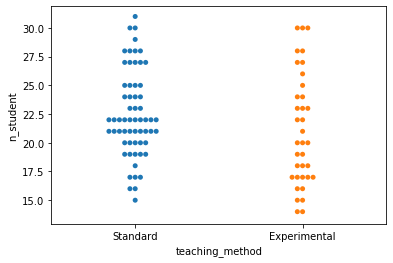

In [74]:
sns.swarmplot(data=df_class, x='teaching_method', y='n_student');

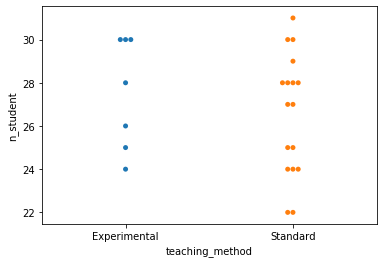

In [75]:
sns.swarmplot(data=df_class[(df_class['school_type']=='Public')&(df_class['school_setting']=='Urban')], 
              x='teaching_method', y='n_student');

In [89]:
def f(df, method, typ, setting):
    return df[(df['teaching_method']==method)&(df['school_type']==typ)&(df['school_setting']==setting)]['posttest'].sum() / len(df[(df['teaching_method']==method)&(df['school_type']==typ)&(df['school_setting']==setting)]) * len(df[df['school_type']==typ])/len(df) * len(df[df['school_setting']==setting])/len(df)

In [90]:
f(df, 'Experimental', 'Public', 'Urban')

18.390941004898863

In [83]:
df['teaching_method'].unique()

array(['Standard', 'Experimental'], dtype=object)

In [80]:
df['school_type'].unique()

array(['Non-public', 'Public'], dtype=object)

In [85]:
df['school_setting'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [91]:
experimental = 0
for i in df['school_type'].unique():
    for j in df['school_setting'].unique():
        experimental += f(df, 'Experimental', i, j)

In [92]:
experimental

71.70994876831543

In [93]:
standard = 0
for i in df['school_type'].unique():
    for j in df['school_setting'].unique():
        standard += f(df, 'Standard', i, j)

In [94]:
standard

63.96656724118184

In [95]:
(experimental - standard)/standard * 100

12.105357315701596

In [96]:
64.0 + 12.1/100 * 64.0

71.744

In [97]:
df['posttest'].mean()

67.10220346929208

The current average test-score is $67.1$. If everyone were forced to have the standard teaching method, the average test-score would be $64.0$. If everyone were forced to have the experimental teaching method, the average test-score would be $71.7$. This is a $12.1\%$ increase compared to the standard method. Therefore, we would recommend the implementation of the experimental teaching method.

In [99]:
df['n_student'].median()

22.0